DATASET DESCRIPTION

# The Diabetes prediction dataset is a collection of along with their diabetes status This is a Glass Identification Data Set from UCI. 
It contains 10 attributes including id. The response is glass type(discrete 7 values)

In [3]:
# project work flow
# 1. choose a data set (i choose kidney prediction classification data)
# 2. import all the  necessary libraries
# 3. load the data set using pandas module
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
# 5. model creation by invoking algorithm
# 6. model training by fitting (x train & y train) data
# 7. model prediction (ypre)- 'using xtest'
# 8. calculate perfomace accuracy using output metrics

RANDOM FOREST

In [4]:
# 2. import all the  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# 3. load the data set using pandas module
dataset =pd.read_csv("glass.csv")

In [6]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
dataset.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [8]:
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [9]:
dataset.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [10]:
dataset.shape

(214, 10)

In [11]:
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
x = dataset.iloc[:,0:9].values
y = dataset.iloc[:,9].values

In [12]:
print(x.shape)
print(y.shape)

(214, 9)
(214,)


In [13]:
x[:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [14]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [15]:
# data spliting
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
print('training input samples count',xtrain.shape)
print('training output samples count',ytrain.shape)
print('testing input samples count',xtest.shape)
print('testing output samples count',ytest.shape)

training input samples count (171, 9)
training output samples count (171,)
testing input samples count (43, 9)
testing output samples count (43,)


In [17]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier()

In [18]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini')

In [19]:
# feature scaling
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)


In [20]:
# 6. model training by fitting (x train & y train) data
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [21]:
# 7. model prediction (ypre)- 'using xtest'
ypre=rf.predict(xtest)

In [22]:
# 8. calculate perfomace accuracy using output metricsds
accuracy_score(ytest,ypre)

0.6046511627906976

In [23]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,2
9,2,2


Glass Prediction Using Decision Tree 

In [24]:
dtree = DecisionTreeClassifier(max_depth = 6,criterion = 'entropy')

In [25]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [26]:
ypre_dt=dtree.predict(xtest)

In [27]:
accuracy_score(ytest,ypre_dt)

0.6744186046511628

In [28]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_dt})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,2
9,2,1


Glass Prediction Using K NEAREST NEIGHBOR

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)

In [30]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [31]:
ypre_kn=knn.predict(xtest)

In [32]:
accuracy_score(ytest,ypre_kn)

0.6046511627906976

In [33]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_kn})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,1
9,2,2


In [34]:
report = pd.DataFrame({'model':['Randomforest','Decisiontree','Knn'],
                       'accuracy%':[accuracy_score(ytest,ypre)*100,accuracy_score(ytest,ypre_dt)*100,
                                     accuracy_score(ytest,ypre_kn)*100]})

In [35]:
report

,model,accuracy%
0,Randomforest,60.465116
1,Decisiontree,67.441860
2,Knn,60.465116


<Axes: ylabel='accuracy%'>

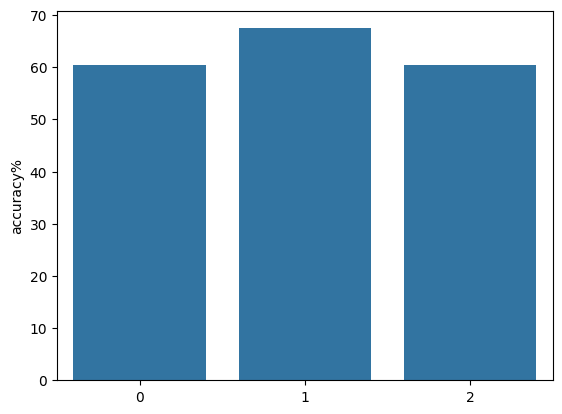

In [36]:
# visualizing the report of all three algorithm
sns.barplot(report['accuracy%'])       

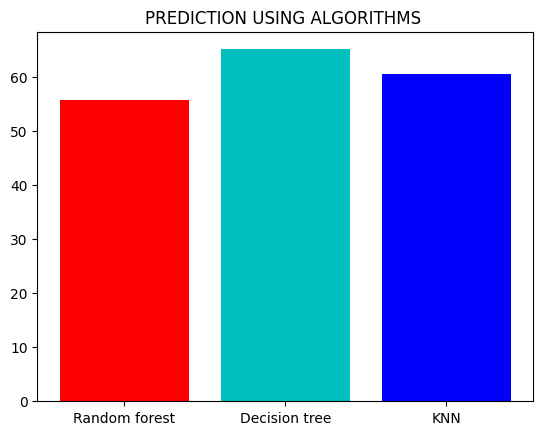

In [37]:
count = [55.81,65.116,60.465]
color_code = ['r','c','b']
plt.bar(['Random forest','Decision tree','KNN'],count,color 
=color_code)
plt.title('PREDICTION USING ALGORITHMS ')
plt.show()

#CONCLUSION : In this study, we investigated the predictive capability of Decision Tree,
KNN and Random forest algorithms in assessing diabetes 
2.	RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
--> 1 building_windows_float_processed
--> 2 building_windows_non_float_processed
--> 3 vehicle_windows_float_processed
--> 4 vehicle_windows_non_float_processed (none in this database)
--> 5 containers
--> 6 tableware
--> 7 headlamps
. Through 
rigorous evaluation, it has been demonstrated that the Decision Tree classifier outperforms the 
other methods, achieving an impressive accuracy rating of 65

RF METHODS - 1

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
dataset1=pd.read_csv("glass.csv")
dataset1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [40]:
X=dataset1.iloc[:,[0,1,2,3,4,5,6,7,8]].values
print(X.shape)
print(X[:5])

(214, 9)
[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


In [41]:
dataset1[:5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [42]:
y=dataset1.iloc[:,9].values
print(y.shape)

(214,)


In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
print('top 5 training input values - before preprocessing')
print('--------------------------------------------------')
print(X_train[:5])

top 5 training input values - before preprocessing
--------------------------------------------------
[[ 1.52315 13.44     3.34     1.23    72.38     0.6      8.83     0.
   0.     ]
 [ 1.52058 12.85     1.61     2.17    72.18     0.76     9.7      0.24
   0.51   ]
 [ 1.51215 12.99     3.47     1.12    72.98     0.62     8.35     0.
   0.31   ]
 [ 1.51115 17.38     0.       0.34    75.41     0.       6.65     0.
   0.     ]
 [ 1.51769 12.45     2.71     1.29    73.7      0.56     9.06     0.
   0.24   ]]


In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) 
X_test=ss.transform(X_test)
print('top 5 training input values - after preprocessing')
print('-------------------------------------------------')
print(X_train[:5])

top 5 training input values - after preprocessing
-------------------------------------------------
[[ 1.84694051  0.04749151  0.47126574 -0.46197366 -0.3661424   0.10252072
  -0.06057741 -0.36123517 -0.5870835 ]
 [ 0.88782886 -0.66013194 -0.75839485  1.39254142 -0.61593736  0.31672703
   0.59709843  0.18175641  4.42555417]
 [-2.25820663 -0.49222129  0.56366798 -0.67899139  0.38324246  0.12929651
  -0.42343305 -0.36123517  2.45981391]
 [-2.63140182  4.77297687 -1.90276106 -2.21784433  3.41825116 -0.70075293
  -1.70854676 -0.36123517 -0.5870835 ]
 [-0.19070525 -1.13987664  0.02347026 -0.34360036  1.2825043   0.04896914
   0.11329092 -0.36123517  1.77180482]]


In [45]:
from sklearn.ensemble import RandomForestClassifier

clfr=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clfr1=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

clfr1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypre=clfr.predict(X_test)

ypre1=clfr1.predict(X_test)

In [48]:
print('entropy Accuracy Score:')
accuracy_score(y_test,ypre)*100

entropy Accuracy Score:


72.3076923076923

In [49]:
print('gini Accuracy Score:')
accuracy_score(y_test,ypre)*100

gini Accuracy Score:


72.3076923076923

In [50]:
print('entropy - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre))
print('gini - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre))

entropy - confusion matrix
--------------------

[[21  3  1  0  0  0]
 [ 3 16  0  1  0  1]
 [ 5  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  8]]
gini - confusion matrix
--------------------

[[21  3  1  0  0  0]
 [ 3 16  0  1  0  1]
 [ 5  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  8]]


In [51]:
print('entropy result\n--------------')
print(classification_report(y_test,ypre))
print('gini index result\n----------------------')
print(classification_report(y_test,ypre))

entropy result
--------------
              precision    recall  f1-score   support

           1       0.70      0.84      0.76        25
           2       0.73      0.76      0.74        21
           3       0.00      0.00      0.00         7
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       0.89      0.89      0.89         9

    accuracy                           0.72        65
   macro avg       0.64      0.67      0.65        65
weighted avg       0.66      0.72      0.69        65

gini index result
----------------------
              precision    recall  f1-score   support

           1       0.70      0.84      0.76        25
           2       0.73      0.76      0.74        21
           3       0.00      0.00      0.00         7
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       0.89      0.89      0.89         9

    ac

<BarContainer object of 3 artists>

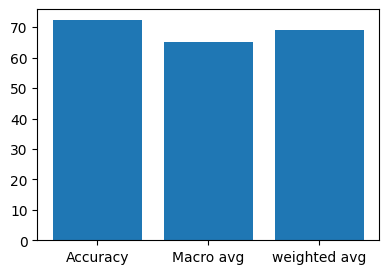

In [52]:
names = ['Accuracy','Macro avg','weighted avg'] 
values = [ 72.30,65.0,69.0] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

K NEAREST NEIGHBOR - KNN

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop('Type',axis=1) # x=df['gene one','gene two']
y = df['Type']
print(X.shape)
print(y.shape)

(214, 9)
(214,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(X_train.shape)
print(y_train.shape)
print('first 10 training time samples')
print(X_train.head(10))

(171, 9)
(171,)
first 10 training time samples
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
2    1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00
213  1.51711  14.23  0.00  2.08  73.36  0.00   8.62  1.67  0.00
3    1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00
164  1.51915  12.73  1.85  1.86  72.69  0.60  10.09  0.00  0.00
14   1.51763  12.61  3.59  1.31  73.29  0.58   8.50  0.00  0.00
77   1.51627  13.00  3.58  1.54  72.83  0.61   8.04  0.00  0.00
54   1.51778  13.21  2.81  1.29  72.98  0.51   9.02  0.00  0.09
187  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00
166  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.00  0.00
94   1.51629  12.71  3.33  1.49  73.28  0.67   8.24  0.00  0.00


In [58]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(X_train[:5])
print('--------------------------')
print(scaled_X_train[:5])

          RI     Na    Mg    Al     Si     K     Ca    Ba   Fe
2    1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00   8.62  1.67  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.0
164  1.51915  12.73  1.85  1.86  72.69  0.60  10.09  0.00  0.0
14   1.51763  12.61  3.59  1.31  73.29  0.58   8.50  0.00  0.0
--------------------------
[[-7.23331736e-01  1.09697246e-01  6.06747266e-01  1.83184272e-01
   4.79787802e-01 -1.35690574e-01 -8.66438871e-01 -3.54077125e-01
  -5.73291999e-01]
 [-4.26629528e-01  9.41284349e-01 -1.86010645e+00  1.23316787e+00
   9.45301898e-01 -7.01619551e-01 -2.69072645e-01  3.21128975e+00
  -5.73291999e-01]
 [-2.51160481e-01 -2.70456858e-01  7.04031638e-01 -3.02919244e-01
   1.69224343e-03  1.25507416e-01 -5.53532753e-01 -3.54077125e-01
  -5.73291999e-01]
 [ 2.24201121e-01 -8.40688014e-01 -5.74562963e-01  8.05396773e-01
   1.02343940e-01  1.69040414e-01  7.76318249e-01 -3.54077125e-01
  -5.73291

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
ypre = knn.predict(scaled_X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [62]:
confusion_matrix(y_test,ypre)

array([[13,  5,  0,  0,  0,  0],
       [ 2, 10,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  6]], dtype=int64)

In [63]:
len(y_test)

43

In [64]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           1       0.76      0.72      0.74        18
           2       0.56      0.83      0.67        12
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      0.86      0.92         7

    accuracy                           0.72        43
   macro avg       0.72      0.65      0.67        43
weighted avg       0.71      0.72      0.70        43



C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,ypre)

0.7209302325581395

In [67]:
t=1-accuracy_score(y_test,ypre)
t

0.2790697674418605

In [68]:
error_rate = []
for i in range(1,11):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)

Text(0, 0.5, 'Error Rate')

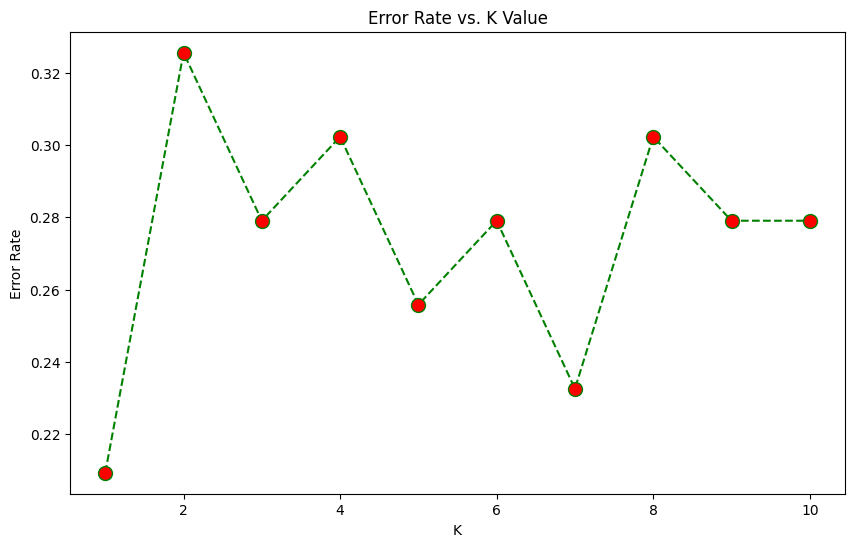

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<BarContainer object of 3 artists>

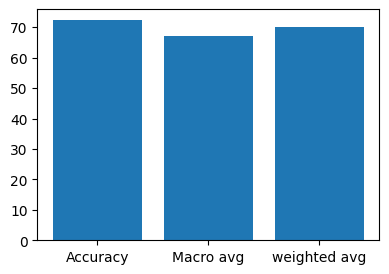

In [70]:
names = ['Accuracy','Macro avg','weighted avg'] 
values = [ 72.30,67.0,70.0] 
f = plt.figure(figsize =(15, 3), num = 15) 
plt.subplot(131) 
plt.bar(names, values)

<BarContainer object of 2 artists>

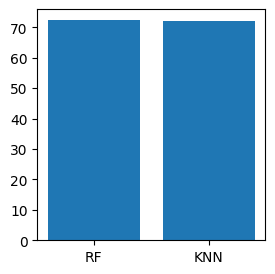

In [71]:
names = ['RF','KNN'] 
values = [ 72.3076,72.093] 
f = plt.figure(figsize =(10, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

Decision Tree

In [72]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [73]:
dataset1=pd.read_csv("glass.csv")
dataset1.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [74]:
def importdata():
    balance_data = pd.read_csv('glass.csv',sep= ',', header = None)
      
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    print ("top 5 data in Dataset:\n ",balance_data.head(5))
    return balance_data

In [75]:
def splitdataset(balance_data):
  
    X = balance_data.values[:, 0:8]
    Y = balance_data.values[:, 9]
  
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, random_state = 10,test_size=0.15)
      
    return X, Y, X_train, X_test, y_train, y_test

In [76]:
def train_using_gini(X_train, X_test, y_train):
  
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 10, max_depth=3, min_samples_leaf=5)
  
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [77]:
def train_using_entropy(X_train, X_test, y_train):
  
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 10,
            max_depth = 3, min_samples_leaf = 5)
  
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [78]:
def prediction(X_test, clf_object):
  
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [79]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix:\n\n----------------\n ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy score: \n-----------------\n",
    accuracy_score(y_test,y_pred)*100)
      
    print("f1 score Report : \n-------------------\n",
    classification_report(y_test, y_pred))

In [80]:
def driver():
      
    data = importdata()
    
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    
    clf_gini = train_using_gini(X_train, X_test, y_train)
    
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    print("Results Using Gini Index:")
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
if __name__=="__main__":
    #driver()
    importdata()
    #splitdataset()
    #train_using_gini(X_train, X_test, y_train)
    #train_using_entropy(X_train, X_test, y_train)

Dataset Length:  215
Dataset Shape:  (215, 10)
top 5 data in Dataset:
           0      1     2     3      4     5     6   7   8     9
0       RI     Na    Mg    Al     Si     K    Ca  Ba  Fe  Type
1  1.52101  13.64  4.49   1.1  71.78  0.06  8.75   0   0     1
2  1.51761  13.89   3.6  1.36  72.73  0.48  7.83   0   0     1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0   0     1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0   0     1
